# Classification with logistic regression and machine learning  
In this section, we will explore classification problems with logistic regression and machine learning. We will use one of sklearns example data sets for this, which is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. The data contains information on medical testing for breast cancer, where the task is to predict if a tumor is malignant (bad) or benign (not so bad). This can be done with features obtained from images taken from the tumor:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension (“coastline approximation” - 1)

The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features.

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

data = load_breast_cancer(as_frame=True) # let us first load the data
X = data.data # These are the predictive features
y = data.target # This is the target information (malignant: 0, or benign: 1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# first we split up the data in training and test as usual 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# we define the classifier to be a logistic regression 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train) # ... and fit the model on the training data
y_pred = clf.predict(X_test) # we can make predictions on the test data

# To analyse the performance we can use a confusion matrix (see lecture slides)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
CM = confusion_matrix(y_test, y_pred)
print(CM) 

[[45  2]
 [ 4 63]]


/Users/hendrikandersen/anaconda3/envs/ws_2024/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


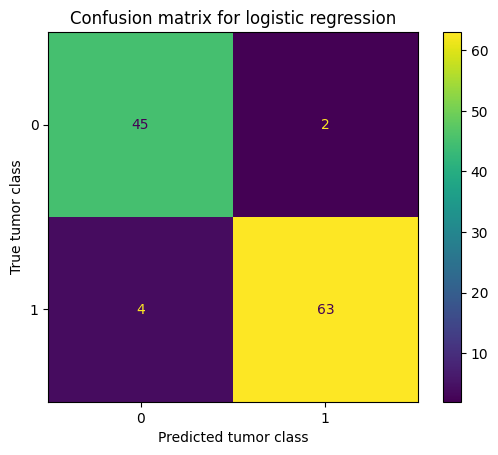

In [3]:
# we can also plot the confusion matrix using the function ConfusionMatrixDisplay 
disp = ConfusionMatrixDisplay(CM)
disp.plot()
plt.xlabel("Predicted tumor class")
plt.ylabel("True tumor class")
plt.title("Confusion matrix for logistic regression")
plt.show()

### Tasks
1. Using the confusion matrix, calculate the following metrics that were discussed in the lecture: 1) Probability of detection (POD), 2) accuracy or percent correct, 3) false alarm rate, 4) bias score.
2. Use the classification results of the logistic regression as a benchmark to test if GBRTs can outperform logistic regression for this specific classification task and by how much (using again the metrics).
3. Use SHAP values to analyze the trained machine learning model: which characteristics of the tumors are indicative of a tumor being malignant or benign, and what does the relationship between the most relevant predictor and the tumor look like?